### Stockprice

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
start_date = '1960-01-01'
end_date = '2024-03-20'

data = yf.download('SPY', start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data['ret'] = data['Close'].pct_change().fillna(0)

<Axes: xlabel='Date'>

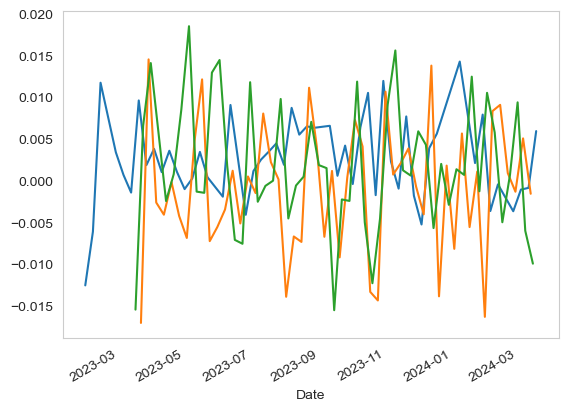

In [4]:
data[data.index.weekday == 0]['ret'][-52:].plot(
    grid = False
)
data[data.index.weekday == 2]['ret'][-52:].plot(
    grid = False
)
data[data.index.weekday == 4]['ret'][-52:].plot(
    grid = False
)

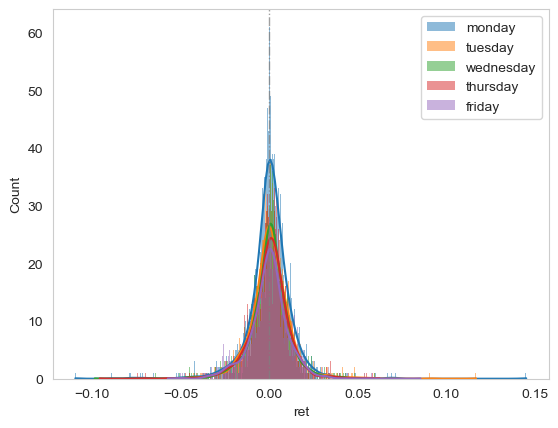

In [5]:
sns.histplot(
    data[data.index.weekday == 0]['ret'],
    bins = 500,
    edgecolor = 'none',
    kde = True,
    label = 'monday'
)
sns.histplot(
    data[data.index.weekday == 1]['ret'],
    bins = 500,
    edgecolor = 'none',
    kde = True,
    label = 'tuesday'
)
sns.histplot(
    data[data.index.weekday == 2]['ret'],
    bins = 500,
    edgecolor = 'none',
    kde = True,
    label = 'wednesday'
)
sns.histplot(
    data[data.index.weekday == 3]['ret'],
    bins = 500,
    edgecolor = 'none',
    kde = True,
    label = 'thursday'
)
sns.histplot(
    data[data.index.weekday == 4]['ret'],
    bins = 500,
    edgecolor = 'none',
    kde = True,
    label = 'friday'
)
plt.axvline(0, color = 'gray', ls = '-.', lw = 1, alpha = 0.75)
plt.legend()
plt.grid(False)
plt.show()

In [6]:
def getStats(ret_list) :
    mean = np.array(
        ret_list
    ).mean()
    std = np.array(
        ret_list
    ).std()
    skew = pd.Series(
        ret_list
    ).skew()
    kurt = pd.Series(
        ret_list
    ).kurt()
    return [mean, std, skew, kurt]

화 -> 수 넘어갈때 분산이 가장 작음

In [7]:
np.mean(
    (data[data.index.weekday == 0]['ret'] - data[data.index.weekday == 0]['ret'].mean())**5
)

2.352387051509179e-08

#### RNN

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [9]:
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [10]:
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

In [11]:
X = []
y = []
seq_length = 20  # 입력 시퀀스 길이

for i in range(seq_length, len(log_returns)):
    X.append(log_returns.values[i-seq_length:i])
    y.append(log_returns.values[i])

X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 날짜 인덱스를 사용하여 X, y를 훈련 및 테스트 세트로 분할
split_idx = log_returns.index.get_loc('2024-01-02') - seq_length  # 2024년 데이터의 시작 인덱스 조정

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
model = Sequential([
    SimpleRNN(1, input_shape = (seq_length, 1), return_sequences = False),
    Dense(1)
])

In [14]:
model.compile(
    optimizer = 'adam', 
    loss = 'mean_squared_error'
)

In [15]:
model.fit(
    X_train, y_train, 
    epochs = 10, 
    validation_data = (X_test, y_test), 
    batch_size = 32
)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0034 - val_loss: 3.0219e-04
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0010 - val_loss: 1.9276e-04
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 6.4158e-04 - val_loss: 1.5012e-04
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 4.6635e-04 - val_loss: 1.2465e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 3.6418e-04 - val_loss: 1.0736e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 2.9881e-04 - val_loss: 9.4997e-05
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 2.5472e-04 - val_loss: 8.5873e-05
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 2.2391e-04 - val_loss: 7.8991e-05
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 2.0185e-04 - val_loss: 7.3713e-05
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 1.8576e-04 - val_loss: 6.9606e-05


In [16]:
predictions_rnn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


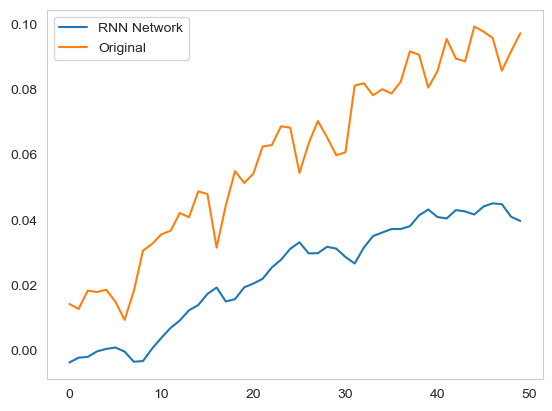

In [17]:
plt.plot(predictions_rnn[-50:].cumsum(), label = 'RNN Network')
plt.plot(log_returns[-50:].values.cumsum(), label = 'Original')
plt.legend()
plt.grid(False)

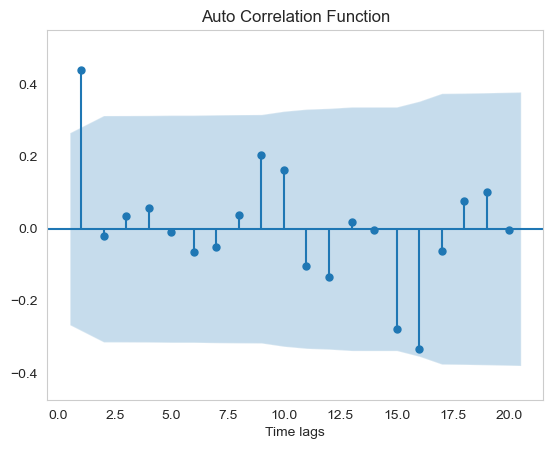

In [18]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(predictions_rnn, auto_ylims = True, lags = range(1, 21))
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function')
plt.show()

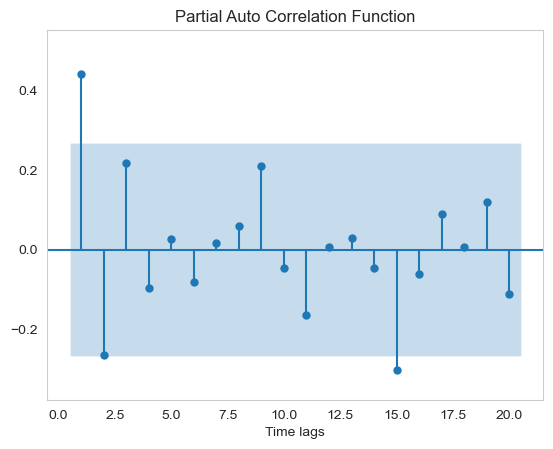

In [19]:
plot_pacf(predictions_rnn, auto_ylims = True, lags = range(1, 21))
plt.grid(False)
plt.xlabel('Time lags')
plt.title('Partial Auto Correlation Function')
plt.show()

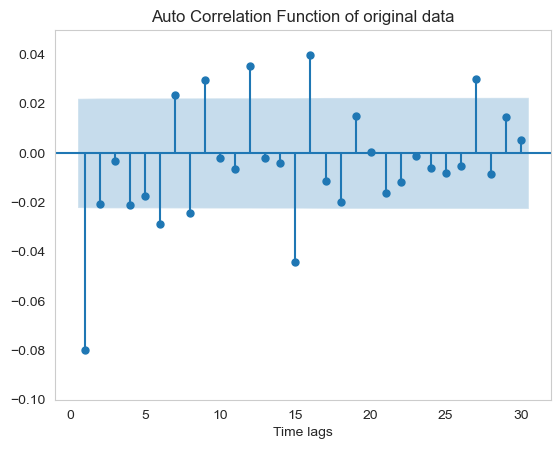

In [20]:
plot_acf(log_returns, auto_ylims = True, lags = range(1, 31))
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function of original data')
plt.show()

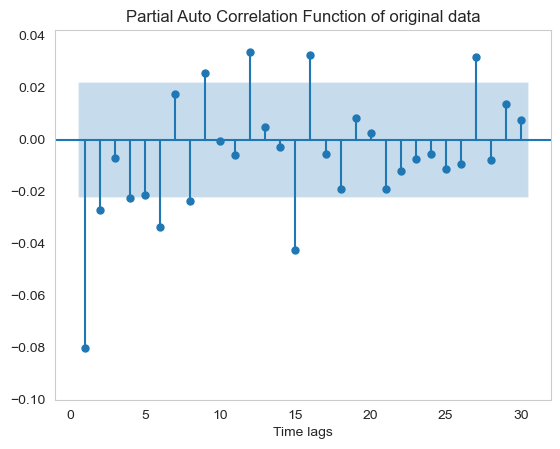

In [21]:
plot_pacf(log_returns, auto_ylims = True, lags = range(1, 31))
plt.grid(False)
plt.xlabel('Time lags')
plt.title('Partial Auto Correlation Function of original data')
plt.show()

In [22]:
model = sm.tsa.ARIMA(
    log_returns[:'2023'], 
    order = (16,0,16), 
    trend = 'c'
).fit(method = 'innovations_mle')

C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 7785
Model:               ARIMA(16, 0, 16)   Log Likelihood               23559.075
Date:                Thu, 21 Mar 2024   AIC                         -47050.151
Time:                        15:17:43   BIC                         -46813.512
Sample:                             0   HQIC                        -46969.043
                               - 7785                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.362      0.018     5.2e-05       0.001
ar.L1         -0.0058      0.165     -0.035      0.972      -0.329       0.317
ar.L2         -0.5457      0.077     -7.064      0.000      -0.697      -0.394
ar.L3         -0.0018      0.166     -0.011      0.991      -0.326       0.323
ar.L4         -0.2970      0.089     -3.343      0.001      -0.471      -0.123
ar.L5         -0.3183      0.134     -2.375      0.018      -0.581      -0.056
ar.L6         -0.3579      0.108     -3.300      0.001      -0.570      -0.145
ar.L7         -0.5777      0.139     -4.163      0.000      -0.850      -0.306
ar.L8         -0.2649      0.150     -1.771      0.077      -0.558       0.028
ar.L9         -0.1777      0.135     -1.321      0.186      -0.441       0.086
ar.L10        -0.1646      0.116     -1.425      0.154      -0.391       0.062
ar.L11        -0.0455      0.115     -0.395      0.693      -0.271       0.180
ar.L12        -0.4609      0.078     -5.892      0.000      -0.614      -0.308
ar.L13        -0.0915      0.148     -0.616      0.538      -0.382       0.199
ar.L14        -0.3091      0.082     -3.754      0.000      -0.470      -0.148
ar.L15         0.0153      0.137      0.112      0.911      -0.253       0.284
ar.L16         0.4139      0.063      6.553      0.000       0.290       0.538
ma.L1         -0.0798      0.165     -0.484      0.628      -0.403       0.243
ma.L2          0.5248      0.076      6.882      0.000       0.375       0.674
ma.L3         -0.0440      0.161     -0.273      0.785      -0.360       0.272
ma.L4          0.2656      0.090      2.945      0.003       0.089       0.442
ma.L5          0.2818      0.129      2.180      0.029       0.028       0.535
ma.L6          0.2846      0.102      2.783      0.005       0.084       0.485
ma.L7          0.5488      0.126      4.365      0.000       0.302       0.795
ma.L8          0.1669      0.139      1.201      0.230      -0.105       0.439
ma.L9          0.1536      0.116      1.324      0.185      -0.074       0.381
ma.L10         0.1119      0.106      1.055      0.291      -0.096       0.320
ma.L11         0.0205      0.103      0.199      0.842      -0.181       0.222
ma.L12         0.4592      0.073      6.304      0.000       0.316       0.602
ma.L13         0.0307      0.143      0.214      0.830      -0.250       0.312
ma.L14         0.2932      0.078      3.746      0.000       0.140       0.447
ma.L15        -0.0956      0.132     -0.727      0.467      -0.353       0.162
ma.L16        -0.3894      0.065     -5.954      0.000      -0.518      -0.261
sigma2         0.0001   1.04e-06    132.472      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             30885.06
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                

In [24]:
model.get_forecast(steps = 52).conf_int()

C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower Close,upper Close
7785,-0.022673,0.023327
7786,-0.022342,0.023825
7787,-0.023488,0.022690
7788,-0.023555,0.022623
7789,-0.021650,0.024537
7790,-0.022653,0.023536
7791,-0.023749,0.022460
7792,-0.023041,0.023173
7793,-0.022378,0.023844
7794,-0.023842,0.022384


In [25]:
forecast_arma = pd.DataFrame(
    [
        model.forecast(steps = 54).values,
        model.get_forecast(steps = 54).conf_int()['lower Close'].values,
        model.get_forecast(steps = 54).conf_int()['upper Close'].values,
        model.get_forecast(steps = 54).conf_int(alpha = 0.01)['lower Close'].values,
        model.get_forecast(steps = 54).conf_int(alpha = 0.01)['upper Close'].values
    ],
    columns = log_returns['2024':].index,
    index = ['forecast_mean', 'lower_bound', 'upper_bound', 'lower_bound2', 'upper_bound2']
).T

C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\envs\FinancialMachineLearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an int

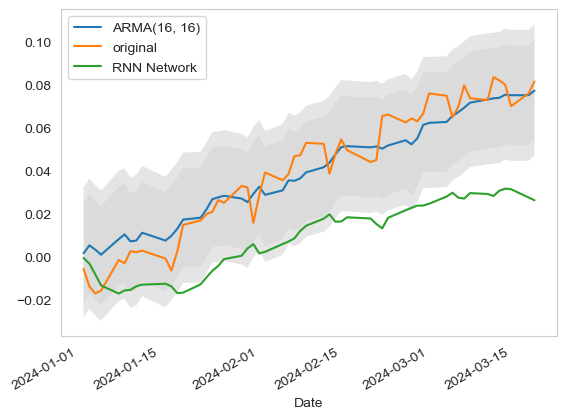

In [26]:
(forecast_arma['forecast_mean'] * 5).cumsum().plot(label = 'ARMA(16, 16)')
log_returns['2024':].cumsum().plot(label = 'original')
plt.fill_between(
    forecast_arma.index, 
    forecast_arma['lower_bound'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    forecast_arma['upper_bound'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    color = 'gray', alpha = 0.1, edgecolor = 'none'
)
plt.fill_between(
    forecast_arma.index, 
    forecast_arma['lower_bound2'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    forecast_arma['upper_bound2'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    color = 'gray', alpha = 0.2, edgecolor = 'none'
)
plt.plot(
    pd.Series(predictions_rnn[-54:].cumsum(), index = forecast_arma.index), 
    label = 'RNN Network'
)
plt.legend()
plt.grid(False)
plt.show()

#### Alpha-t RNN model

In [39]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    GRU(10, activation = 'silu', input_shape = (seq_length, 1)),
    Dense(1)
])

In [40]:
model_gru.compile(
    optimizer = 'adam', 
    loss = 'mean_squared_error'
)

In [41]:
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_gru.fit(
    X_train, y_train, 
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4217e-04
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4083e-04
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4042e-04
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4011e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3990e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3974e-04
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3963e-04
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3954e-04
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3947e-04
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3941e-04


In [43]:
predictions_gru = model_gru.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


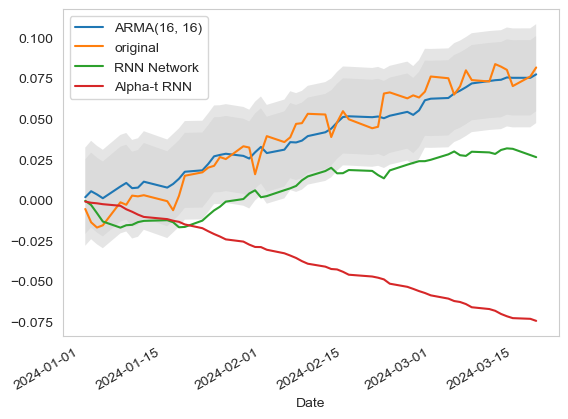

In [44]:
(forecast_arma['forecast_mean'] * 5).cumsum().plot(label = 'ARMA(16, 16)')
log_returns['2024':].cumsum().plot(label = 'original')
plt.fill_between(
    forecast_arma.index, 
    forecast_arma['lower_bound'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    forecast_arma['upper_bound'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    color = 'gray', alpha = 0.1, edgecolor = 'none'
)
plt.fill_between(
    forecast_arma.index, 
    forecast_arma['lower_bound2'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    forecast_arma['upper_bound2'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    color = 'gray', alpha = 0.2, edgecolor = 'none'
)
plt.plot(
    pd.Series(predictions_rnn[-54:].cumsum(), index = forecast_arma.index), 
    label = 'RNN Network'
)
plt.plot(
    pd.Series(predictions_gru[-54:].cumsum(), index = forecast_arma.index), 
    label = 'Alpha-t RNN'
)
plt.legend()
plt.grid(False)
plt.show()

#### LSTM

In [45]:
from tensorflow.keras.layers import LSTM
lstm = Sequential()
lstm.add(LSTM(10, activation = 'silu', input_shape = (seq_length, 1), return_sequences = False))
lstm.add(Dense(1))

In [46]:
lstm.compile(
    optimizer = 'adam', 
    loss = 'mean_squared_error'
)

In [47]:
lstm.fit(
    X_train, y_train, 
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4093e-04
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4023e-04
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3997e-04
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3980e-04
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3970e-04
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3962e-04
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3956e-04
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3952e-04
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3948e-04
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3945e-04


In [48]:
predictions_lstm = lstm.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


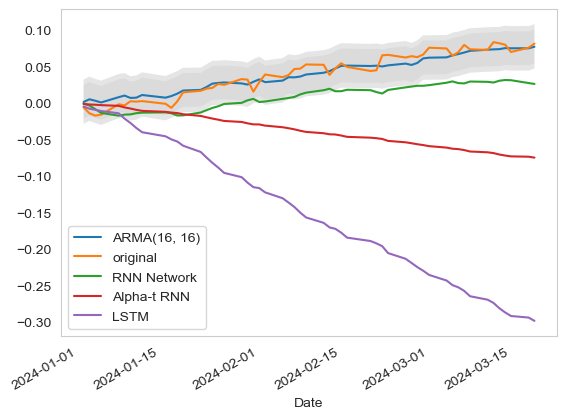

In [49]:
(forecast_arma['forecast_mean'] * 5).cumsum().plot(label = 'ARMA(16, 16)')
log_returns['2024':].cumsum().plot(label = 'original')
plt.fill_between(
    forecast_arma.index, 
    forecast_arma['lower_bound'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    forecast_arma['upper_bound'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    color = 'gray', alpha = 0.1, edgecolor = 'none'
)
plt.fill_between(
    forecast_arma.index, 
    forecast_arma['lower_bound2'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    forecast_arma['upper_bound2'] + (forecast_arma['forecast_mean'] * 5).cumsum(), 
    color = 'gray', alpha = 0.2, edgecolor = 'none'
)
plt.plot(
    pd.Series(predictions_rnn[-54:].cumsum(), index = forecast_arma.index), 
    label = 'RNN Network'
)
plt.plot(
    pd.Series(predictions_gru[-54:].cumsum(), index = forecast_arma.index), 
    label = 'Alpha-t RNN'
)
plt.plot(
    pd.Series(predictions_lstm[-54:].cumsum() * 5, index = forecast_arma.index), 
    label = 'LSTM'
)
plt.legend()
plt.grid(False)
plt.show()

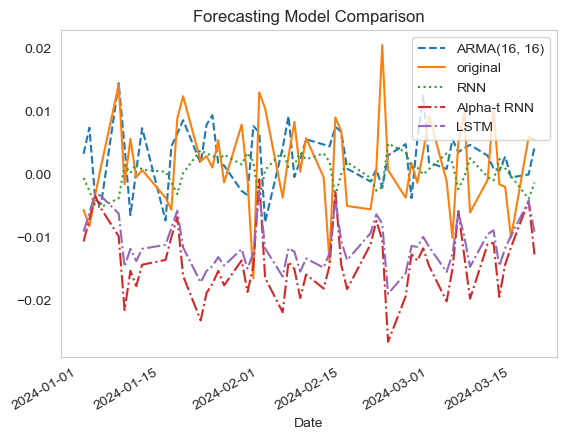

In [50]:
(forecast_arma['forecast_mean'] * 10).plot(label = 'ARMA(16, 16)', ls = '--')
log_returns['2024':].plot(label = 'original')
plt.plot(
    pd.Series(predictions_rnn[-54:].reshape(1, -1)[0], index = forecast_arma.index), 
    label = 'RNN',
    ls = ':'
)
plt.plot(
    pd.Series(predictions_gru[-54:].reshape(1, -1)[0] * 10, index = forecast_arma.index), 
    label = 'Alpha-t RNN',
    ls = '-.'
)
plt.plot(
    pd.Series(predictions_lstm[-54:].reshape(1, -1)[0] * 10, index = forecast_arma.index), 
    label = 'LSTM',
    ls = '-.'
)
plt.legend()
plt.grid(False)
plt.title('Forecasting Model Comparison')
plt.show()

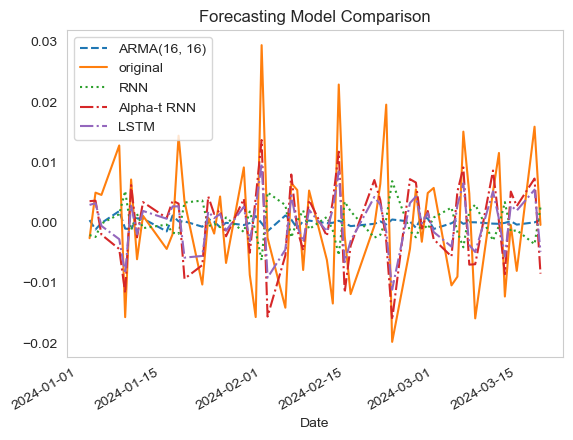

In [51]:
(forecast_arma['forecast_mean'].diff()).plot(label = 'ARMA(16, 16)', ls = '--')
log_returns['2024':].diff().plot(label = 'original')
plt.plot(
    pd.Series(predictions_rnn[-54:].reshape(1, -1)[0], index = forecast_arma.index).diff(), 
    label = 'RNN',
    ls = ':'
)
plt.plot(
    pd.Series(predictions_gru[-54:].reshape(1, -1)[0] * 10, index = forecast_arma.index).diff(), 
    label = 'Alpha-t RNN',
    ls = '-.'
)
plt.plot(
    pd.Series(predictions_lstm[-54:].reshape(1, -1)[0] * 10, index = forecast_arma.index).diff(), 
    label = 'LSTM',
    ls = '-.'
)
plt.legend()
plt.grid(False)
plt.title('Forecasting Model Comparison')
plt.show()

#### Note

regression 문제를 classification으로 바꾸면 더 좋지 않을까?